<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/04_06_Compare_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Compare Regression**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH04/CH04_SEC04_1_CompareRegression.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model

rcParams.update({'font.size': 12})

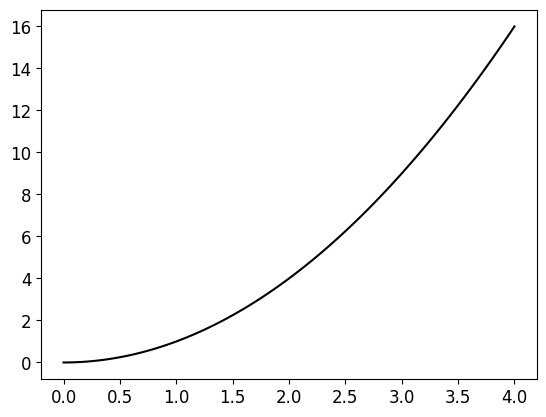

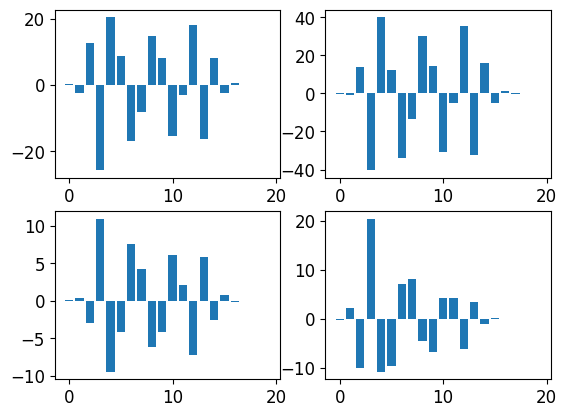

In [2]:
n = 100
L = 4
x = np.linspace(0,L,n)

# f(x) = x^2
f = np.power(x,2) # Parabola with 100 data points

M = 20 # Polynomial degree

# 100 by 20 matrix for coefficients
phi = np.zeros((n,M))

for j in range(M):
    phi[:,j] = np.power(x,j) # Build matrix A

plt.figure()
# Plot the function, f(x)=x^2
plt.plot(x,f,color='k')

#For visualization
#for j in range(4):
#    # Add small random noise to the function and plot on top of the previous plot.
#    fn = np.power(x,2) + 0.1*np.random.randn(*x.shape)
#    plt.plot(x,fn)

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

for j in range(4):
    # Add small random noise to the function and plot on top of the previous plot.
    fn = np.power(x,2) + 0.1*np.random.randn(*x.shape)
    # Find the coefficients of polynomial
    an = np.linalg.pinv(phi) @ fn # Least-square fit
    # Calculate the approximated function
    fna = phi @ an
    # Calculate the normalized L2 error
    En = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
    axs[j].bar(range(len(an)),an)

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e+01, tolerance: 2.338e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.491e+00, tolerance: 2.338e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+01, tolerance: 2.327e

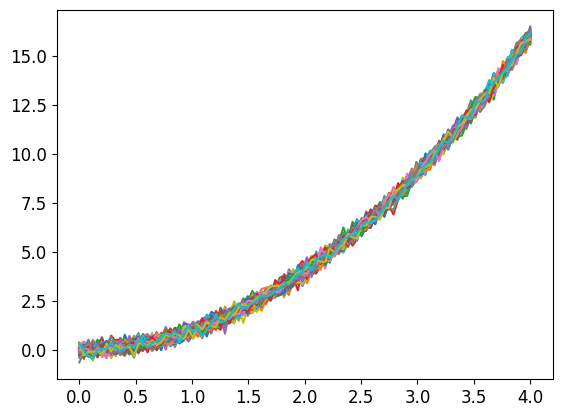

In [3]:
## Different regressions
plt.figure()
plt.plot(x,f,color='k')

M = 20 # Polynomial degree

# Lambda 1 to control L1 error, see the slides for the definition.
lam = 0.1

phi2 = phi[:,1:]

E1 = np.zeros(100)
E2 = np.zeros(100)
E3 = np.zeros(100)
E4 = np.zeros(100)
E5 = np.zeros(100)
E6 = np.zeros(100)

A1 = np.zeros((M,100))
A2 = np.zeros((M,100))
A3 = np.zeros((M,100))
A4 = np.zeros((M,100))
A5 = np.zeros((M,100))
A6 = np.zeros((M,100))

for jj in range(100):
# for jj in range(10):

    # f(x) = x^2 + random noise (twice the previous example)
    f = np.power(x,2)+0.2*np.random.randn(n)

    ############################################################################
    # The (Moore-Penrose) pseudo-inverse of a matrix (pinv)
    a1 = np.linalg.pinv(phi) @ f

    # Calculate the approximation
    f1 = phi @ a1

    # Normalized L2 Error
    E1[jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)

    ############################################################################
    # Return the least-squares solution to a linear matrix equation (lstsq)
    a2 = np.linalg.lstsq(phi,f,rcond=None)[0]
    f2 = phi @ a2
    E2[jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)

    ############################################################################
    # Linear regression with combined L1 and L2 priors as regularizer.
    #
    # alpha   : Constant that multiplies the penalty terms. Defaults to 1.0.
    #           alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object.
    #
    # l1_ratio: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1.
    #           For l1_ratio = 0 the penalty is an L2 penalty.
    #           For l1_ratio = 1 it is an L1 penalty.
    #           For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
    #
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
    regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr3.fit(phi, f)
    a3 = regr3.coef_
    f3 = phi @ a3
    E3[jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)

    ############################################################################
    # Linear regression with combined L1 and L2 priors as regularizer.
    # see above comments for more information.
    regr4 = linear_model.ElasticNet(alpha=0.8, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr4.fit(phi, f)
    a4 = regr4.coef_
    f4 = phi @ a4
    E4[jj] = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)

    ############################################################################
    # L2-regularized linear regression model that is robust to outliers.
    huber = linear_model.HuberRegressor().fit(phi, f) # matlab's robustfit() does not have an exact sklearn analogue
    a5 = huber.coef_
    f5 = phi @ a5
    E5[jj] = np.linalg.norm(f-f5,ord=2)/np.linalg.norm(f,ord=2)

    ############################################################################
    # Linear least squares with L2 regularization.
    # This model solves a regression model where the loss function is the linear
    # least squares function and regularization is given by the l2-norm.
    # Also known as Ridge Regression or Tikhonov regularization.
    # This estimator has built-in support for multi-variate regression
    # (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
    ridge = linear_model.Ridge(alpha=1.0).fit(phi,f)
    a6 = ridge.coef_
    f6 = phi @ a6
    E6[jj] = np.linalg.norm(f-f6,ord=2)/np.linalg.norm(f,ord=2)


    A1[:,jj] = a1
    A2[:,jj] = a2
    A3[:,jj] = a3
    A4[:,jj] = a4
    A5[:,jj] = a5
    A6[:,jj] = a6

    plt.plot(x,f)

Err = np.column_stack((E1,E2,E3,E4,E5,E6))
Err2 = np.column_stack((E1,E2,E3,E4,E5))

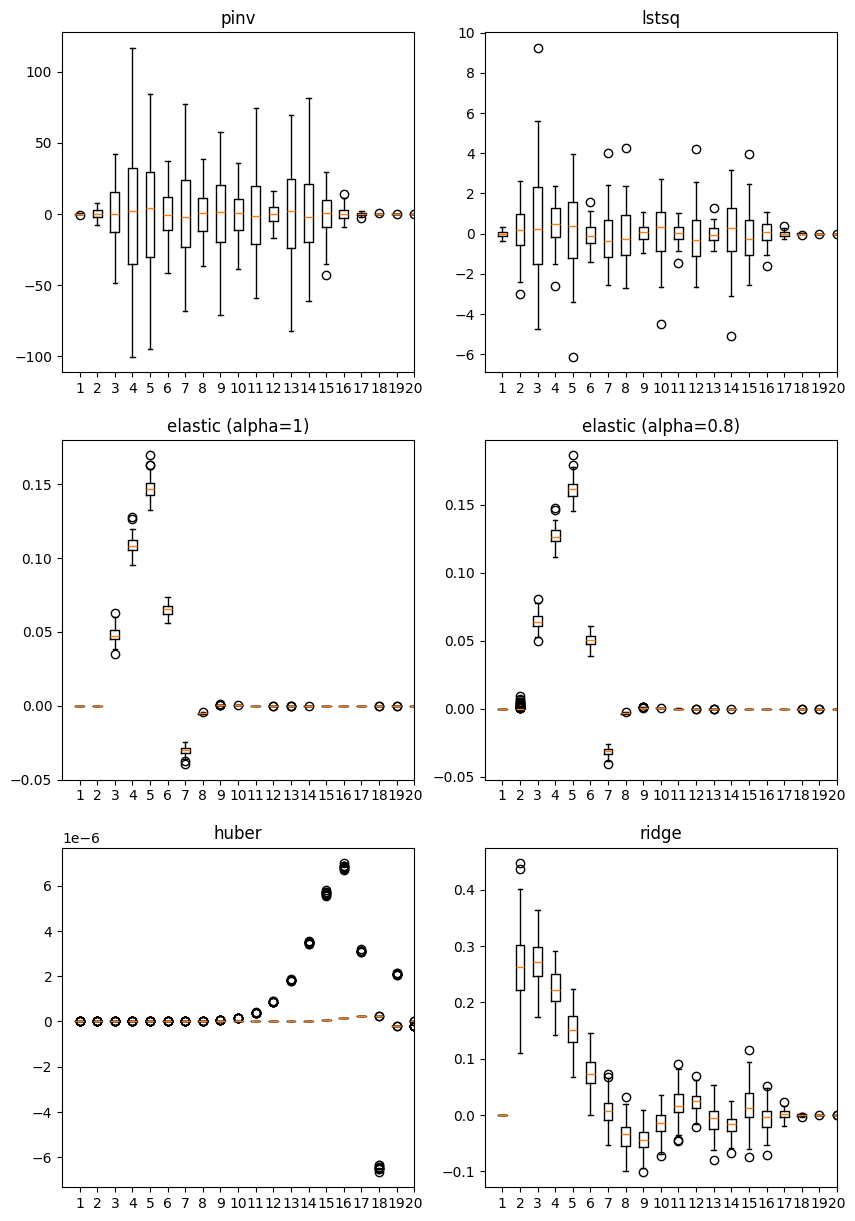

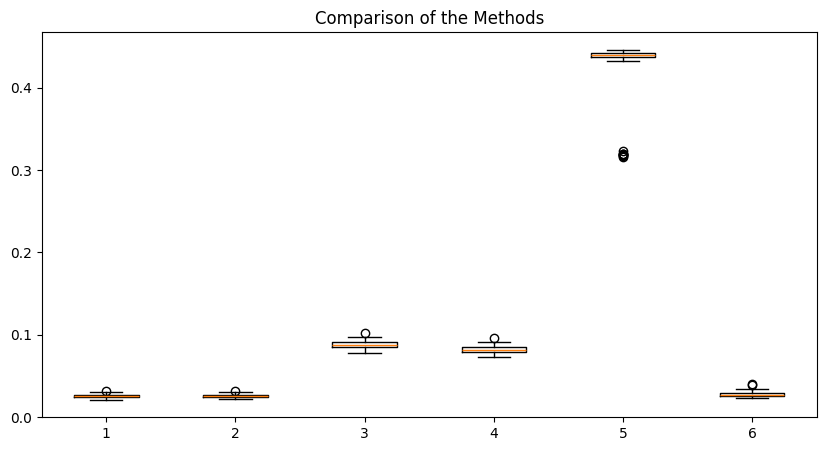

In [4]:
plt.rcParams['figure.figsize'] = [10, 15]
rcParams.update({'font.size': 10})
fig,axs = plt.subplots(3,2)
axs = axs.reshape(-1)

axs[0].boxplot(A1.T)
axs[0].set_title('pinv')
axs[1].boxplot(A2.T)
axs[1].set_title('lstsq')
axs[2].boxplot(A3.T)
axs[2].set_title('elastic (alpha=1)')
axs[3].boxplot(A4.T)
axs[3].set_title('elastic (alpha=0.8)')
axs[4].boxplot(A5.T)
axs[4].set_title('huber')
axs[5].boxplot(A6.T)
axs[5].set_title('ridge')

for ax in axs:
    ax.set_xlim(0,M)

plt.rcParams['figure.figsize'] = [10, 5]

plt.figure()
plt.title('Comparison of the Methods')
plt.boxplot(Err)

plt.show()

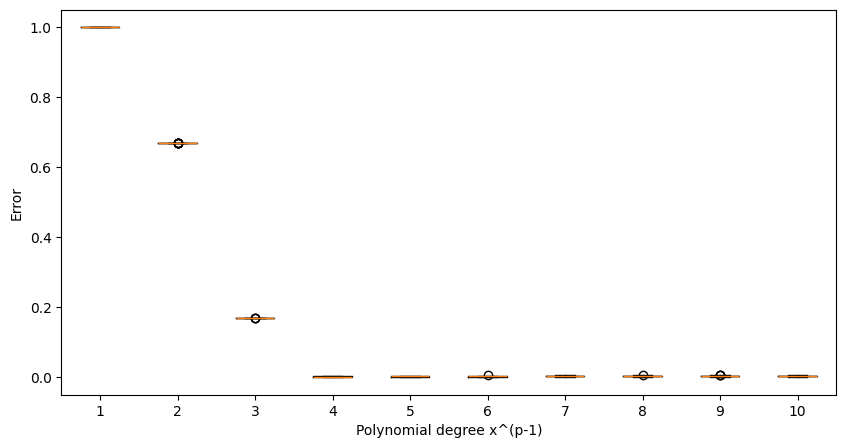

In [5]:
M = 10

En = np.zeros((100,M))

phi = np.zeros((len(x),M))

for jj in range(M):
    for j in range(jj):
        phi[:,j] = np.power(x,j)
    f = np.power(x,2)
    for j in range(100):
        fn = np.power(x,2) + 0.1*np.random.randn(n)
        an = np.linalg.pinv(phi) @ fn
        fna = phi @ an
        En[j,jj] = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)

plt.boxplot(En)
plt.xlabel('Polynomial degree x^(p-1)')
plt.ylabel('Error')
plt.show()